<a href="https://colab.research.google.com/github/Lukasz2107/learning/blob/main/Neural_network_fashion_clothes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = keras.datasets.fashion_mnist # download dataset
(train_images, train_labels), (test_images, test_labels) = data.load_data()
# print(train_labels[0])    labels are betwenn 0-9

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot'] # these are the acutal names of the labels


In [4]:
#plt.imshow(train_images[7], cmap=plt.cm.binary) # this is how to show image
#plt.show()


train_images = train_images/255.0 #we need to divide the values by 255 because we want a smaller number
test_images = test_images/255.0

# print(train_images[7]) # each row is a list with rgb value

at this point we load our data, now were creating model


we want to flat the data


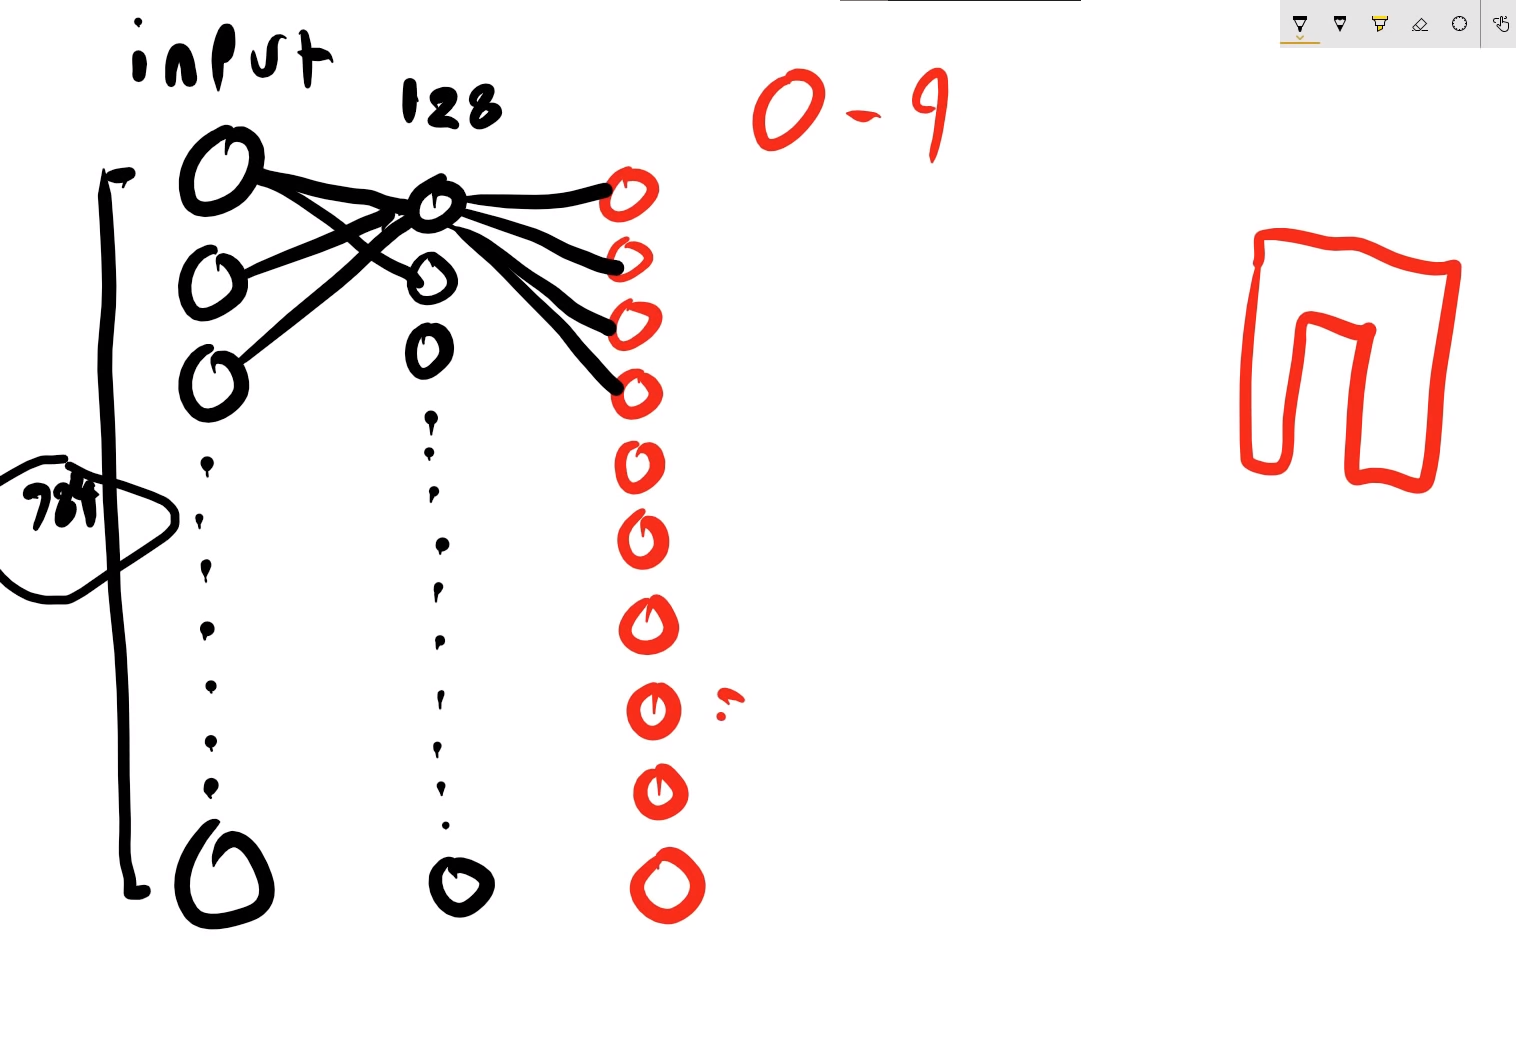

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer
    keras.layers.Dense(128, activation="relu"), #rectifile linear unit, hidden layer
    keras.layers.Dense(10, activation="softmax") # output layer, from 0 to 1 probability
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) #
model.fit(train_images, train_labels, epochs=5) # epochs = how many times the model see the same information

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5000 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3754 - accuracy: 0.8648
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3384 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3147 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2941 - accuracy: 0.8926


In [6]:
prediction = model.predict(test_images)

# as the output we get a list that contains the predictable values in percentage

print(np.sum(prediction[0]))


313/313 [==============================] - 1s 2ms/step
1.0


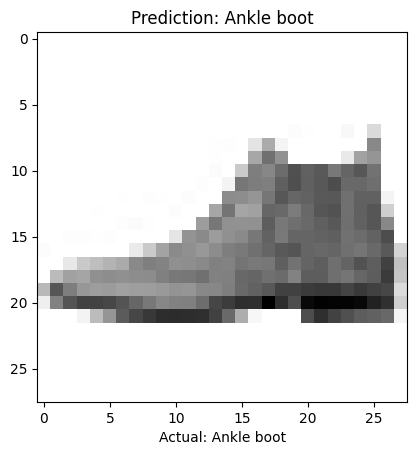

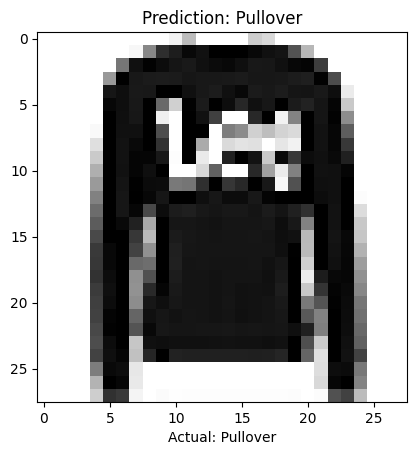

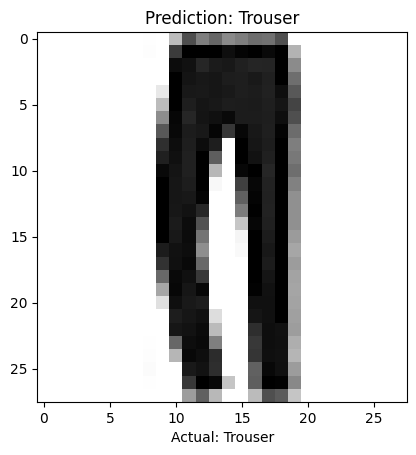

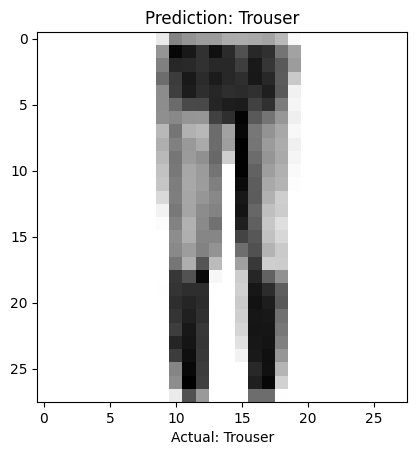

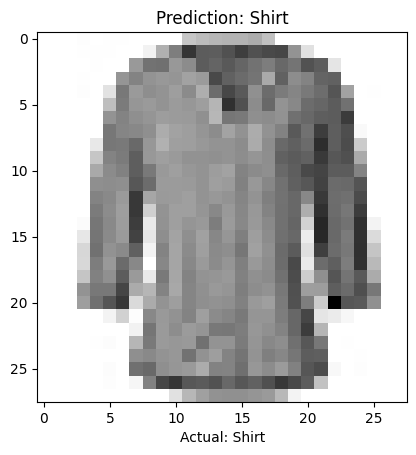

CORRECT
Actual: Ankle boot
Prediction: Ankle boot

CORRECT
Actual: Pullover
Prediction: Pullover

CORRECT
Actual: Trouser
Prediction: Trouser

CORRECT
Actual: Trouser
Prediction: Trouser

CORRECT
Actual: Shirt
Prediction: Shirt

CORRECT
Actual: Trouser
Prediction: Trouser

CORRECT
Actual: Coat
Prediction: Coat

CORRECT
Actual: Shirt
Prediction: Shirt

CORRECT
Actual: Sandal
Prediction: Sandal

CORRECT
Actual: Sneaker
Prediction: Sneaker

CORRECT
Actual: Coat
Prediction: Coat

CORRECT
Actual: Sandal
Prediction: Sandal

INCORRECT
Actual: Sneaker
Prediction: Sandal

CORRECT
Actual: Dress
Prediction: Dress

CORRECT
Actual: Coat
Prediction: Coat

CORRECT
Actual: Trouser
Prediction: Trouser

CORRECT
Actual: Pullover
Prediction: Pullover

INCORRECT
Actual: Coat
Prediction: Pullover

CORRECT
Actual: Bag
Prediction: Bag

CORRECT
Actual: T-shirt/top
Prediction: T-shirt/top

CORRECT
Actual: Pullover
Prediction: Pullover

CORRECT
Actual: Sandal
Prediction: Sandal

CORRECT
Actual: Sneaker
Predictio

In [8]:
# we use a "np.argmax" to find the highest value in list because it is the most possible choice
# then we dont want a number but a name of a fashion item so we put that in class_names list

for i in range(5):
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel('Actual: ' + class_names[test_labels[i]])
  plt.title('Prediction: ' + class_names[np.argmax(prediction[i])])
  plt.show()


k = 0
for i in range(len(prediction)):
  if class_names[np.argmax(prediction[i])] == class_names[test_labels[i]]:
    k+=1
    print("CORRECT")
  else:
    print("INCORRECT")

  print('Actual: ' + class_names[test_labels[i]])
  print('Prediction: ' + class_names[np.argmax(prediction[i])])
  print()


print("Accuracy:", k / len(prediction) * 100)